In [1]:
from sklearn.model_selection import train_test_split


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("credit_risk_cleaned.csv")

In [4]:
model_df = df.copy()

In [5]:
model_df.head()

,customer_id,credit_limit,age,repayment_sep,repayment_aug,repayment_july,repayment_june,repayment_may,repayment_apr,bill_sep,...,default_next_month,avg_delay,max_delay,num_delayed_months,default_exposure,avg_bill,utilization_ratio,avg_repayment,max_repayment,delayed_months
0,1,20000,24,2,2,-1,-1,-2,-2,3913,...,1,-0.333333,2,2,20000,1284.000000,0.064200,-0.333333,2,2
1,2,120000,26,-1,2,0,0,0,2,2682,...,1,0.500000,2,2,120000,2846.166667,0.023718,0.500000,2,2
2,3,90000,34,0,0,0,0,0,0,29239,...,0,0.000000,0,0,0,16942.166667,0.188246,0.000000,0,0
3,4,50000,37,0,0,0,0,0,0,46990,...,0,0.000000,0,0,0,38555.666667,0.771113,0.000000,0,0
4,5,50000,57,-1,0,-1,0,0,0,8617,...,0,-0.333333,0,0,0,18223.166667,0.364463,-0.333333,0,0


In [6]:
y = model_df["default_next_month"]

x = model_df.drop(columns =["customer_id","default_next_month"] )

In [7]:
x = pd.get_dummies( x , drop_first=True)

In [8]:
x_train , x_test , y_train , y_test = train_test_split( x, y , test_size = 0.2 , random_state = 42 , stratify = y )

In [9]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=800)
model.fit(x_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [11]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

y_pred = model.predict(x_test_scaled)
y_prob = model.predict_proba(x_test_scaled)[:,1]

print("ROC AUC :", roc_auc_score(y_test, y_prob))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ROC AUC : 1.0
[[4673    0]
 [   2 1325]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4673
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



In [12]:
coefficients = pd.DataFrame({
    "Feature": x.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

coefficients.head(10)

,Feature,Coefficient
23,default_exposure,20.374133
25,utilization_ratio,0.700295
28,delayed_months,0.135842
22,num_delayed_months,0.135842
21,max_delay,0.110366
27,max_repayment,0.110366
2,repayment_sep,0.106123
1,age,0.033483
7,repayment_apr,0.019514
26,avg_repayment,-0.015674


In [13]:
# Defalut exposure is too high as a result it leaks the information
x = x.drop(columns = ["default_exposure"])

In [16]:
y = df["default_next_month"]
x = df.drop(columns = ["default_next_month" , "default_exposure"])

In [17]:
x_train , x_test , y_train , y_test = train_test_split( x, y , test_size = 0.3 , random_state = 42 , stratify = y )

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(x_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [20]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

y_pred = model.predict(x_test_scaled)
y_prob = model.predict_proba(x_test_scaled)[:,1]


In [21]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6694  315]
 [1425  566]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      7009
           1       0.64      0.28      0.39      1991

    accuracy                           0.81      9000
   macro avg       0.73      0.62      0.64      9000
weighted avg       0.78      0.81      0.78      9000



In [22]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", round(roc_auc, 3))

ROC-AUC: 0.748


In [23]:
from sklearn.metrics import confusion_matrix, classification_report

for t in [0.3, 0.4, 0.5, 0.6]:

    print("\n==============================")
    print("Threshold:", t)

    y_pred_custom = (y_prob >= t).astype(int)

    print(confusion_matrix(y_test, y_pred_custom))
    print(classification_report(y_test, y_pred_custom))


Threshold: 0.3
[[5956 1053]
 [ 921 1070]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      7009
           1       0.50      0.54      0.52      1991

    accuracy                           0.78      9000
   macro avg       0.69      0.69      0.69      9000
weighted avg       0.79      0.78      0.78      9000


Threshold: 0.4
[[6330  679]
 [1145  846]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      7009
           1       0.55      0.42      0.48      1991

    accuracy                           0.80      9000
   macro avg       0.70      0.66      0.68      9000
weighted avg       0.78      0.80      0.79      9000


Threshold: 0.5
[[6694  315]
 [1425  566]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      7009
           1       0.64      0.28      0.39      1991

    accuracy                           0.81      9000

In [24]:
import numpy as np

cost_fn = 10000   # cost of missing a defaulter
cost_fp = 1000    # cost of rejecting a good customer

thresholds = [0.3, 0.4, 0.5, 0.6]

for t in thresholds:
    y_pred_custom = (y_prob >= t).astype(int)
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_custom).ravel()
    
    total_cost = (fn * cost_fn) + (fp * cost_fp)
    
    print("Threshold:", t)
    print("Total Cost:", total_cost)
    print("------------------------")

Threshold: 0.3
Total Cost: 10263000
------------------------
Threshold: 0.4
Total Cost: 12129000
------------------------
Threshold: 0.5
Total Cost: 14565000
------------------------
Threshold: 0.6
Total Cost: 16286000
------------------------


In [25]:
# Fixing final threshold to 0.3 
optimal_threshold = 0.3

y_pred_final = (y_prob >= optimal_threshold).astype(int)

print("Final Model Using Threshold:", optimal_threshold)
print(confusion_matrix(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))

Final Model Using Threshold: 0.3
[[5956 1053]
 [ 921 1070]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      7009
           1       0.50      0.54      0.52      1991

    accuracy                           0.78      9000
   macro avg       0.69      0.69      0.69      9000
weighted avg       0.79      0.78      0.78      9000



In [26]:
# Creating Deployment scoring function
def predict_default_probability(input_data):
    """
    input_data: dataframe with same structure as training features
    """
    input_scaled = scaler.transform(input_data)
    probability = model.predict_proba(input_scaled)[:,1]
    
    decision = (probability >= optimal_threshold).astype(int)
    
    return probability, decision

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# Calculate ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = roc_auc_score(y_test, y_prob)

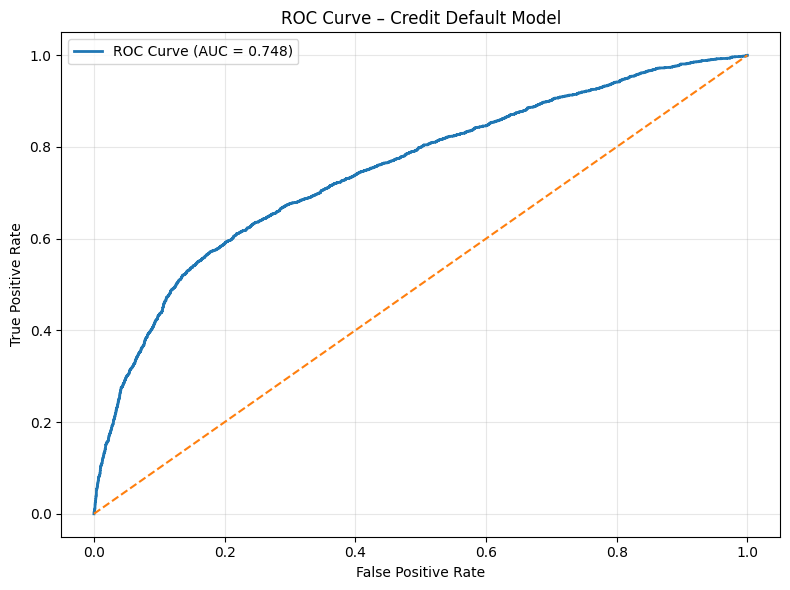

In [29]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Credit Default Model")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("ROC_Curve.png", dpi=300)
plt.show()

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Use threshold 0.4 (best cost from your analysis)
t = 0.4
y_pred_custom = (y_prob >= t).astype(int)

cm = confusion_matrix(y_test, y_pred_custom)


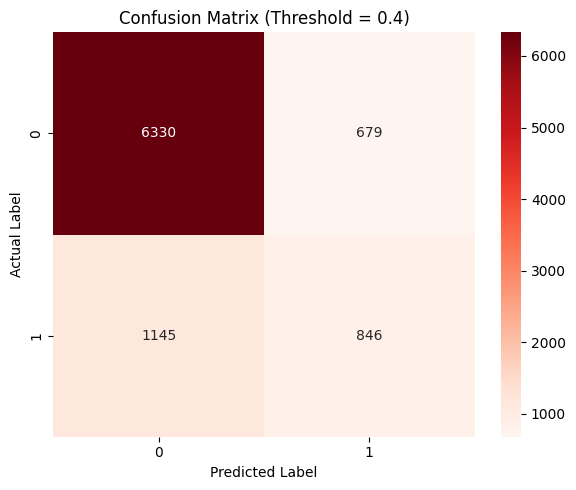

In [39]:

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix (Threshold = 0.4)")
plt.tight_layout()
plt.savefig("Confusion Matrix.png" , dpi = 300)
plt.show()